In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [73]:
train=pd.read_csv(r'C:\Users\PERSONAL\Downloads\train (2).csv',index_col="Id")

In [74]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
#train.info()

In [76]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

# Dividing the feature variables into categorical and numerical

In [77]:
categorical=[var for var in train.columns if train[var].dtypes=='object']
categorical


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [78]:

print("no. of categorical values: ",len(categorical))

no. of categorical values:  43


In [79]:
numerical=[var for var in train.columns if train[var].dtypes!='object']
year=[yr for yr in numerical if 'Yr' in yr or 'Year' in yr]

In [249]:
year

['YearRemodAdd', 'GarageYrBlt']

In [81]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Text(0, 0.5, 'Sales price')

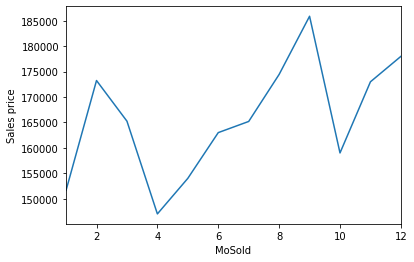

In [82]:
train.groupby(['MoSold'])['SalePrice'].median().plot()
plt.ylabel('Sales price')

# Dividing the numerical value into continuous and discrete values

In [83]:
# discrete values from the data set
discrete=[]
for var in numerical:
    if(len(train[var].unique())<20 and var not in year):
        print(var,' values: ',train[var].unique())
        discrete.append(var)
print()
print("no. of discrete values ",len(discrete))
#print(discrete)

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

no. of discrete values  14


In [84]:
#continuous value from the data set
continuous=[]
for var in numerical:
    if(var not in discrete and var not in year and var not in ['Id']):
        print(var,)
        continuous.append(var)
print("no. of continous values: ",len(continuous))        
    

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal
SalePrice
no. of continous values:  19


In [85]:
for var in continuous:
    print(train[var].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinS

MasVnrArea =0 means construction has not been done
BsmtFinSF1=0 means there is no finished  type 1 basement area
BsmtFinSF2 =0 means there is no finished  type 2 basement area
BsmtUnfSF=0 means there is no unfinished square feet of basement area
TotalBsmtSF=0 ;Total square feet of basement area


In [86]:
#missing value percentage
for var in train.columns:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

LotFrontage :  17.73972602739726 %
Alley :  93.76712328767123 %
MasVnrType :  0.547945205479452 %
MasVnrArea :  0.547945205479452 %
BsmtQual :  2.5342465753424657 %
BsmtCond :  2.5342465753424657 %
BsmtExposure :  2.6027397260273974 %
BsmtFinType1 :  2.5342465753424657 %
BsmtFinType2 :  2.6027397260273974 %
Electrical :  0.0684931506849315 %
FireplaceQu :  47.26027397260274 %
GarageType :  5.5479452054794525 %
GarageYrBlt :  5.5479452054794525 %
GarageFinish :  5.5479452054794525 %
GarageQual :  5.5479452054794525 %
GarageCond :  5.5479452054794525 %
PoolQC :  99.52054794520548 %
Fence :  80.75342465753424 %
MiscFeature :  96.30136986301369 %


In [87]:
#fetching most missing values
for var in train.columns:
    if(train[var].isnull().mean()>0.95):
        print(var,": ",train[var].unique())
        

PoolQC :  [nan 'Ex' 'Fa' 'Gd']
MiscFeature :  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


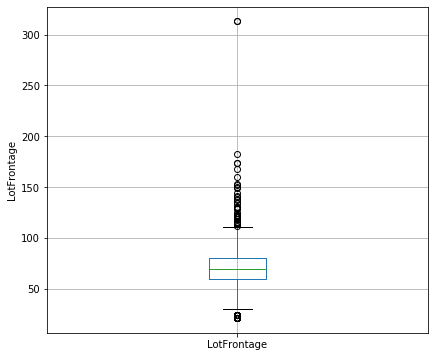

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


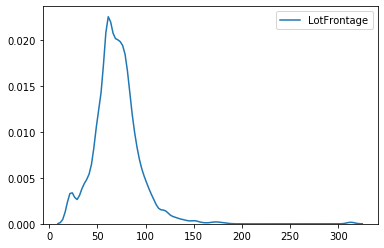

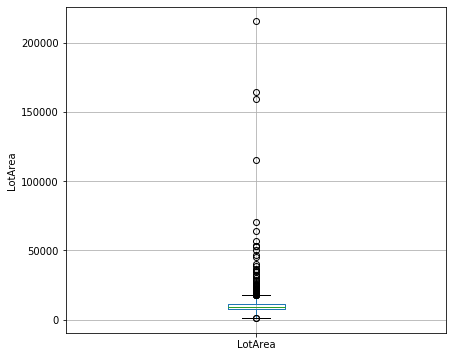

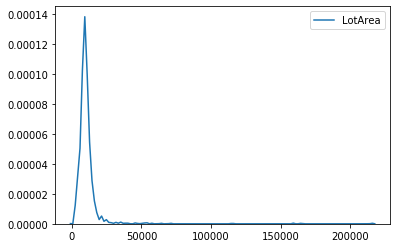

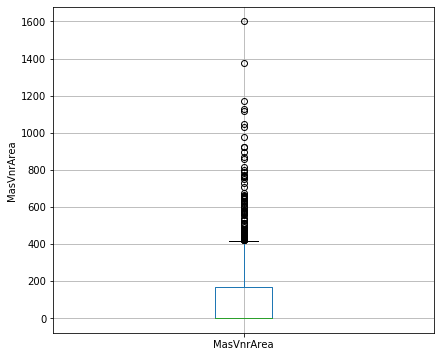

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


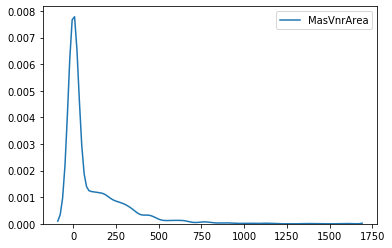

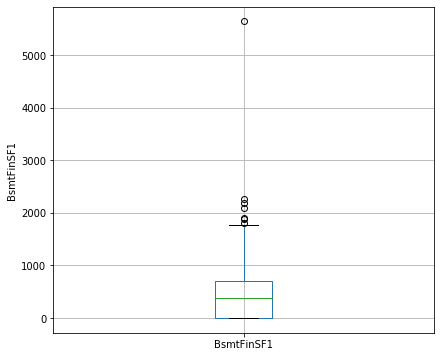

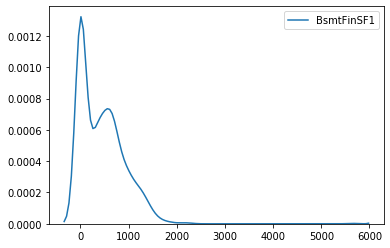

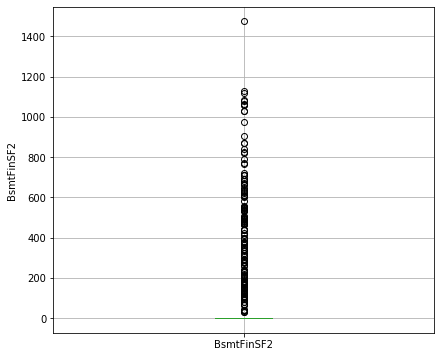

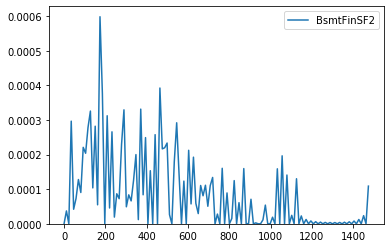

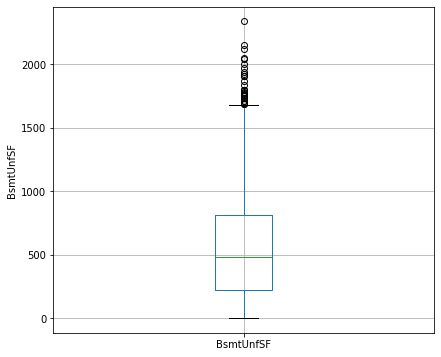

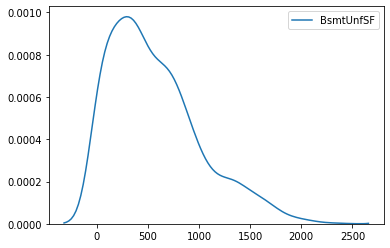

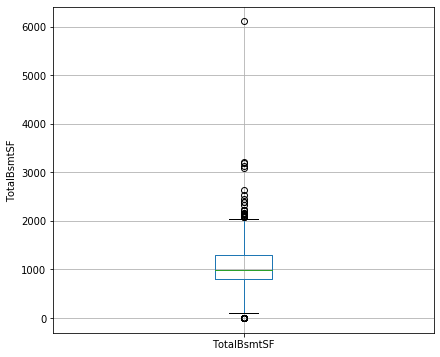

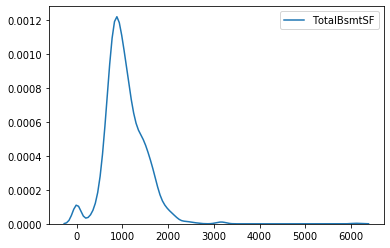

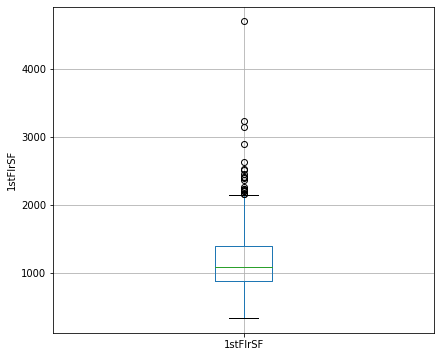

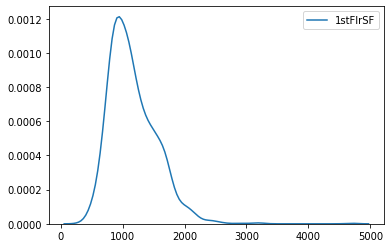

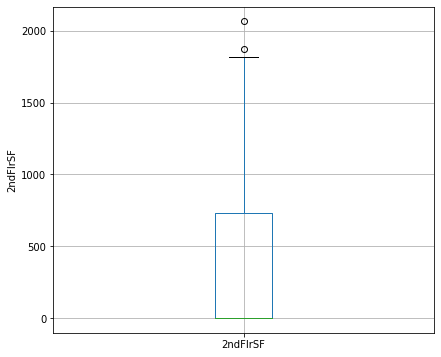

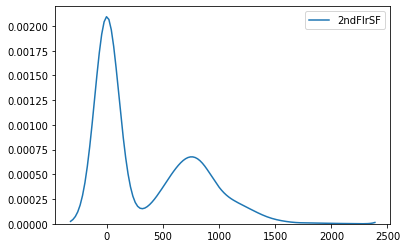

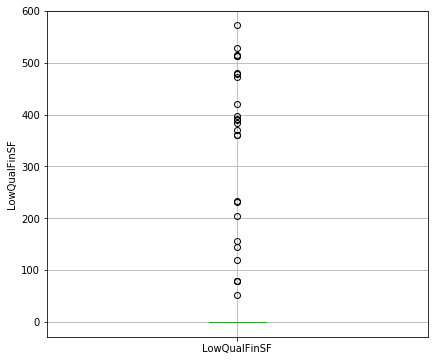

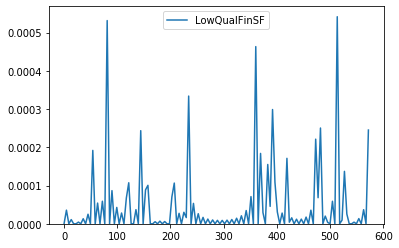

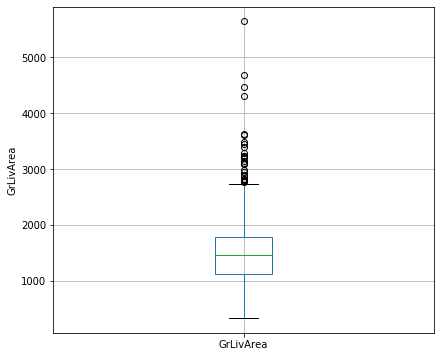

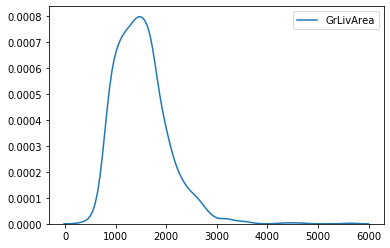

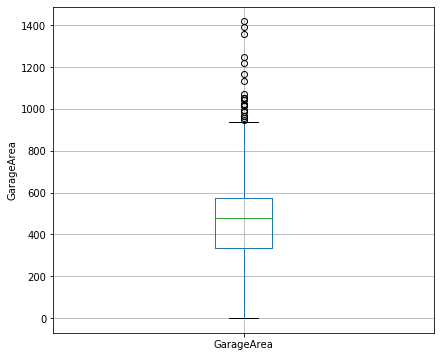

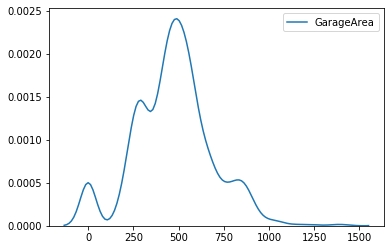

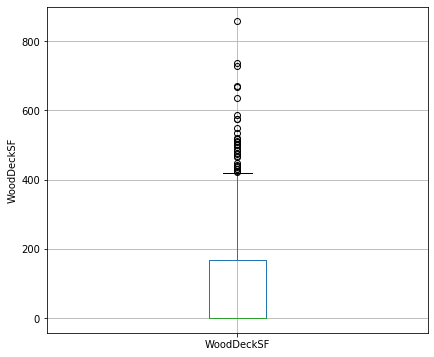

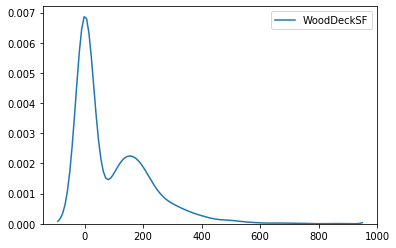

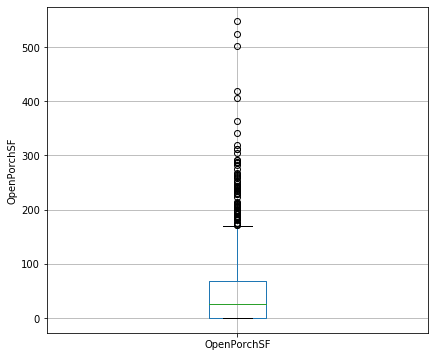

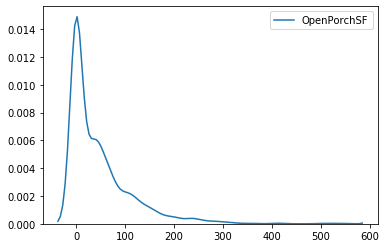

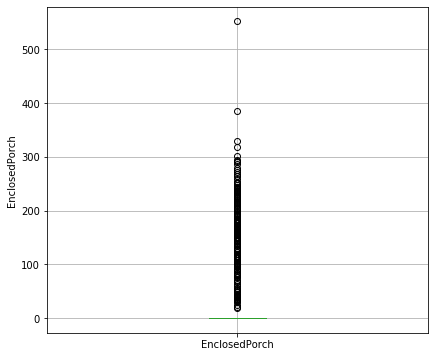

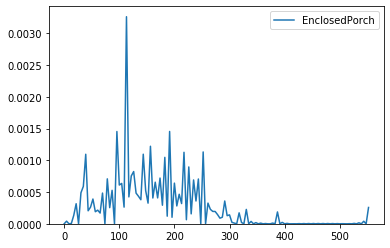

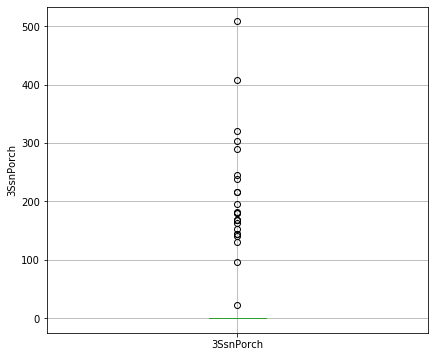

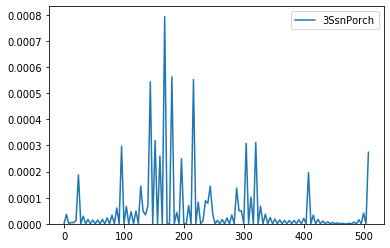

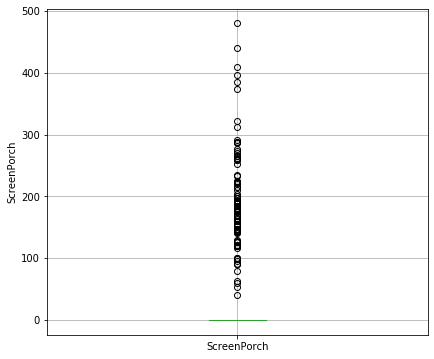

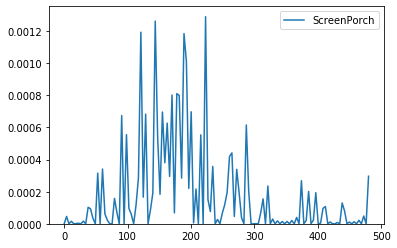

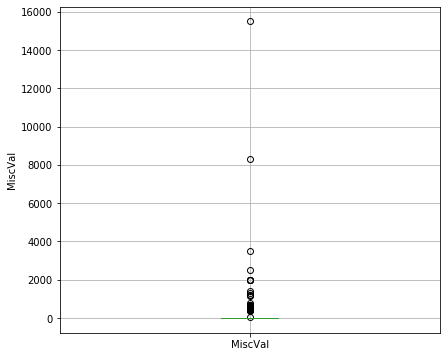

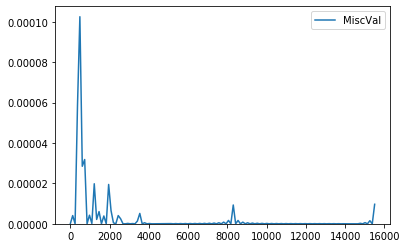

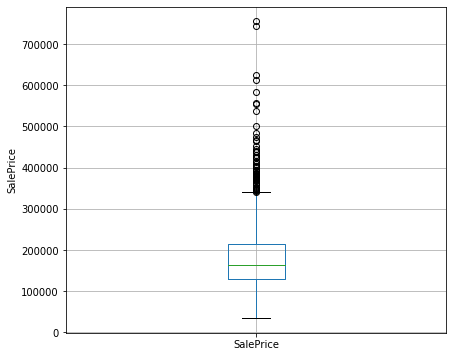

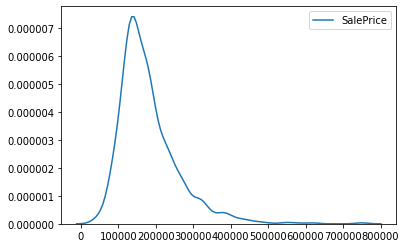

In [88]:
#checking outliers
for var in continuous:
    #print(type(train[var]))
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig=train.boxplot(column=var)
    fig.set_ylabel(var)
    plt.show()
#checking skewness
    sns.kdeplot(train[var])

In [89]:
#handling outliers
for var in continuous:
    q1=train[var].quantile(0.25)
    q3=train[var].quantile(0.75)
    iqr=q3-q1
    #print(var,'--->', iqr)
    upper_fence=q3+3*iqr
    lower_fence=q1-3*iqr
    #print(var," ",upper_fence," ",lower_fence)
    
    

In [90]:
for var in continuous:
    if((train[var]>upper_fence).all()):
        print(var)
    if((train[var]<lower_fence).all()):
        print(var)

In [91]:
train.skew(axis=0,skipna=True)

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

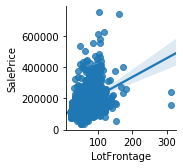

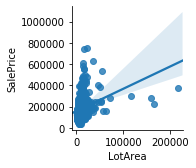

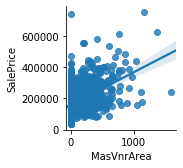

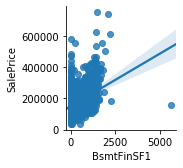

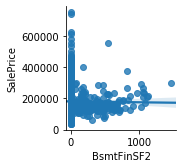

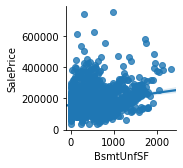

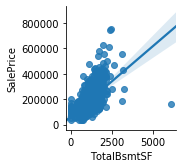

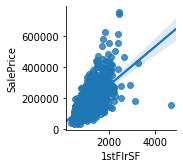

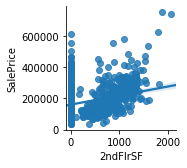

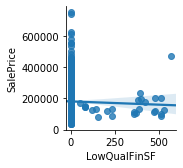

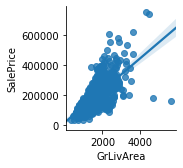

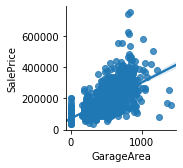

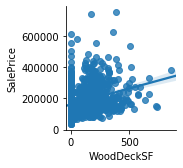

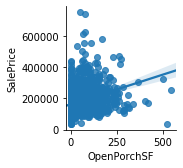

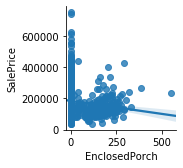

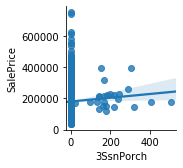

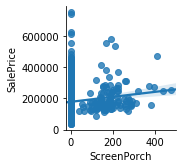

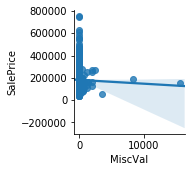

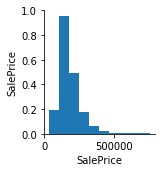

In [92]:

for var in continuous:
    sns.pairplot(train,x_vars=[var],y_vars=["SalePrice"],kind='reg')
    
    #print(type(train[var]))

In [93]:
#for var in year:
 #   sns.pairplot(train,x_vars=[var],y_vars=["SalePrice"],kind='reg')

In [94]:
def elapsed_year(df,var):
    df[var]=df['YrSold']-df[var]
    return df

In [95]:
for var in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train=elapsed_year(train,var)

In [96]:
train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


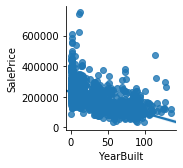

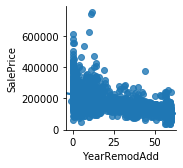

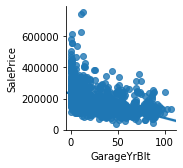

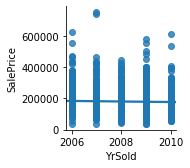

In [97]:
#normalized
for var in year:
    sns.pairplot(train,x_vars=[var],y_vars=["SalePrice"],kind='reg')

In [98]:
#discrete outliers
for vars in discrete:
    print(train[vars].value_counts()/np.float(len(train))*100)
    

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64
0    58.630137
1    40.273973
2     1.027397
3     0.068493
Name: BsmtFullBath, dtype: float64
0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64
2    52.602740
1    44.520548
3     2.260274
0     0.616438
Name: FullBath, dtype: float64
0    62.534247
1    36.643836
2     0.821918
Name: HalfBath, dtype: float64
3    55

In [99]:
for var in year:
    if(train[var].isnull().sum()<0):
        print(var, "---->",train[var].isnull().sum()*100/len(train[var],"%"))

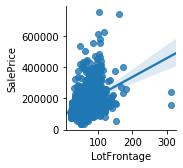

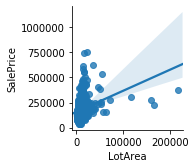

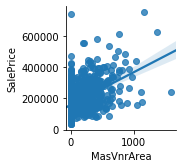

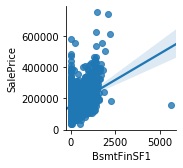

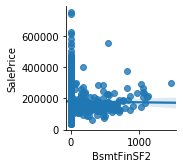

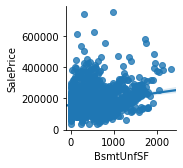

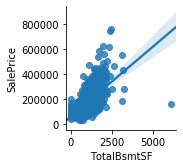

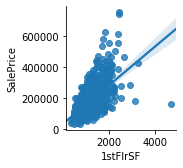

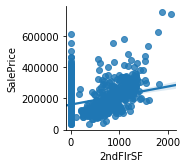

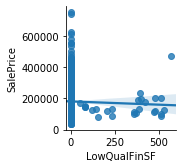

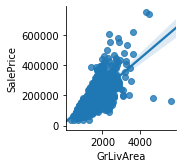

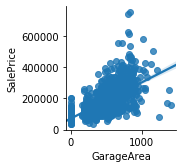

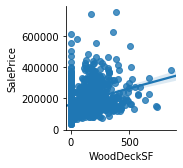

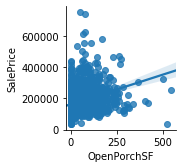

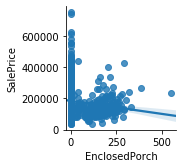

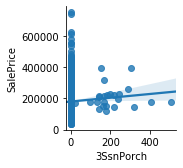

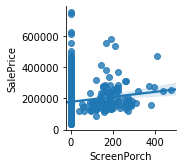

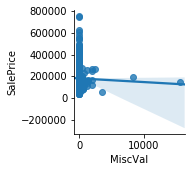

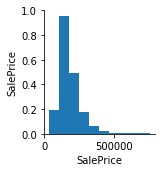

In [100]:
for var in continuous:
    sns.pairplot(train,x_vars=[var],y_vars=["SalePrice"],kind='reg')

In [101]:
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [102]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [103]:
drop_list=['Alley','PoolQC']
train.drop(drop_list,axis=1,inplace=True)

In [104]:
train.drop(['MiscFeature'],axis=1,inplace=True)

In [105]:
categorical=[var for var in train.columns if train[var].dtypes=='object']
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [106]:
#checking cardinality of discrete variables
for var in categorical:
    print(var,'--->',len(train[var].unique()))

MSZoning ---> 5
Street ---> 2
LotShape ---> 4
LandContour ---> 4
Utilities ---> 2
LotConfig ---> 5
LandSlope ---> 3
Neighborhood ---> 25
Condition1 ---> 9
Condition2 ---> 8
BldgType ---> 5
HouseStyle ---> 8
RoofStyle ---> 6
RoofMatl ---> 8
Exterior1st ---> 15
Exterior2nd ---> 16
MasVnrType ---> 5
ExterQual ---> 4
ExterCond ---> 5
Foundation ---> 6
BsmtQual ---> 5
BsmtCond ---> 5
BsmtExposure ---> 5
BsmtFinType1 ---> 7
BsmtFinType2 ---> 7
Heating ---> 6
HeatingQC ---> 5
CentralAir ---> 2
Electrical ---> 6
KitchenQual ---> 4
Functional ---> 7
FireplaceQu ---> 6
GarageType ---> 7
GarageFinish ---> 4
GarageQual ---> 6
GarageCond ---> 6
PavedDrive ---> 3
Fence ---> 5
SaleType ---> 9
SaleCondition ---> 6


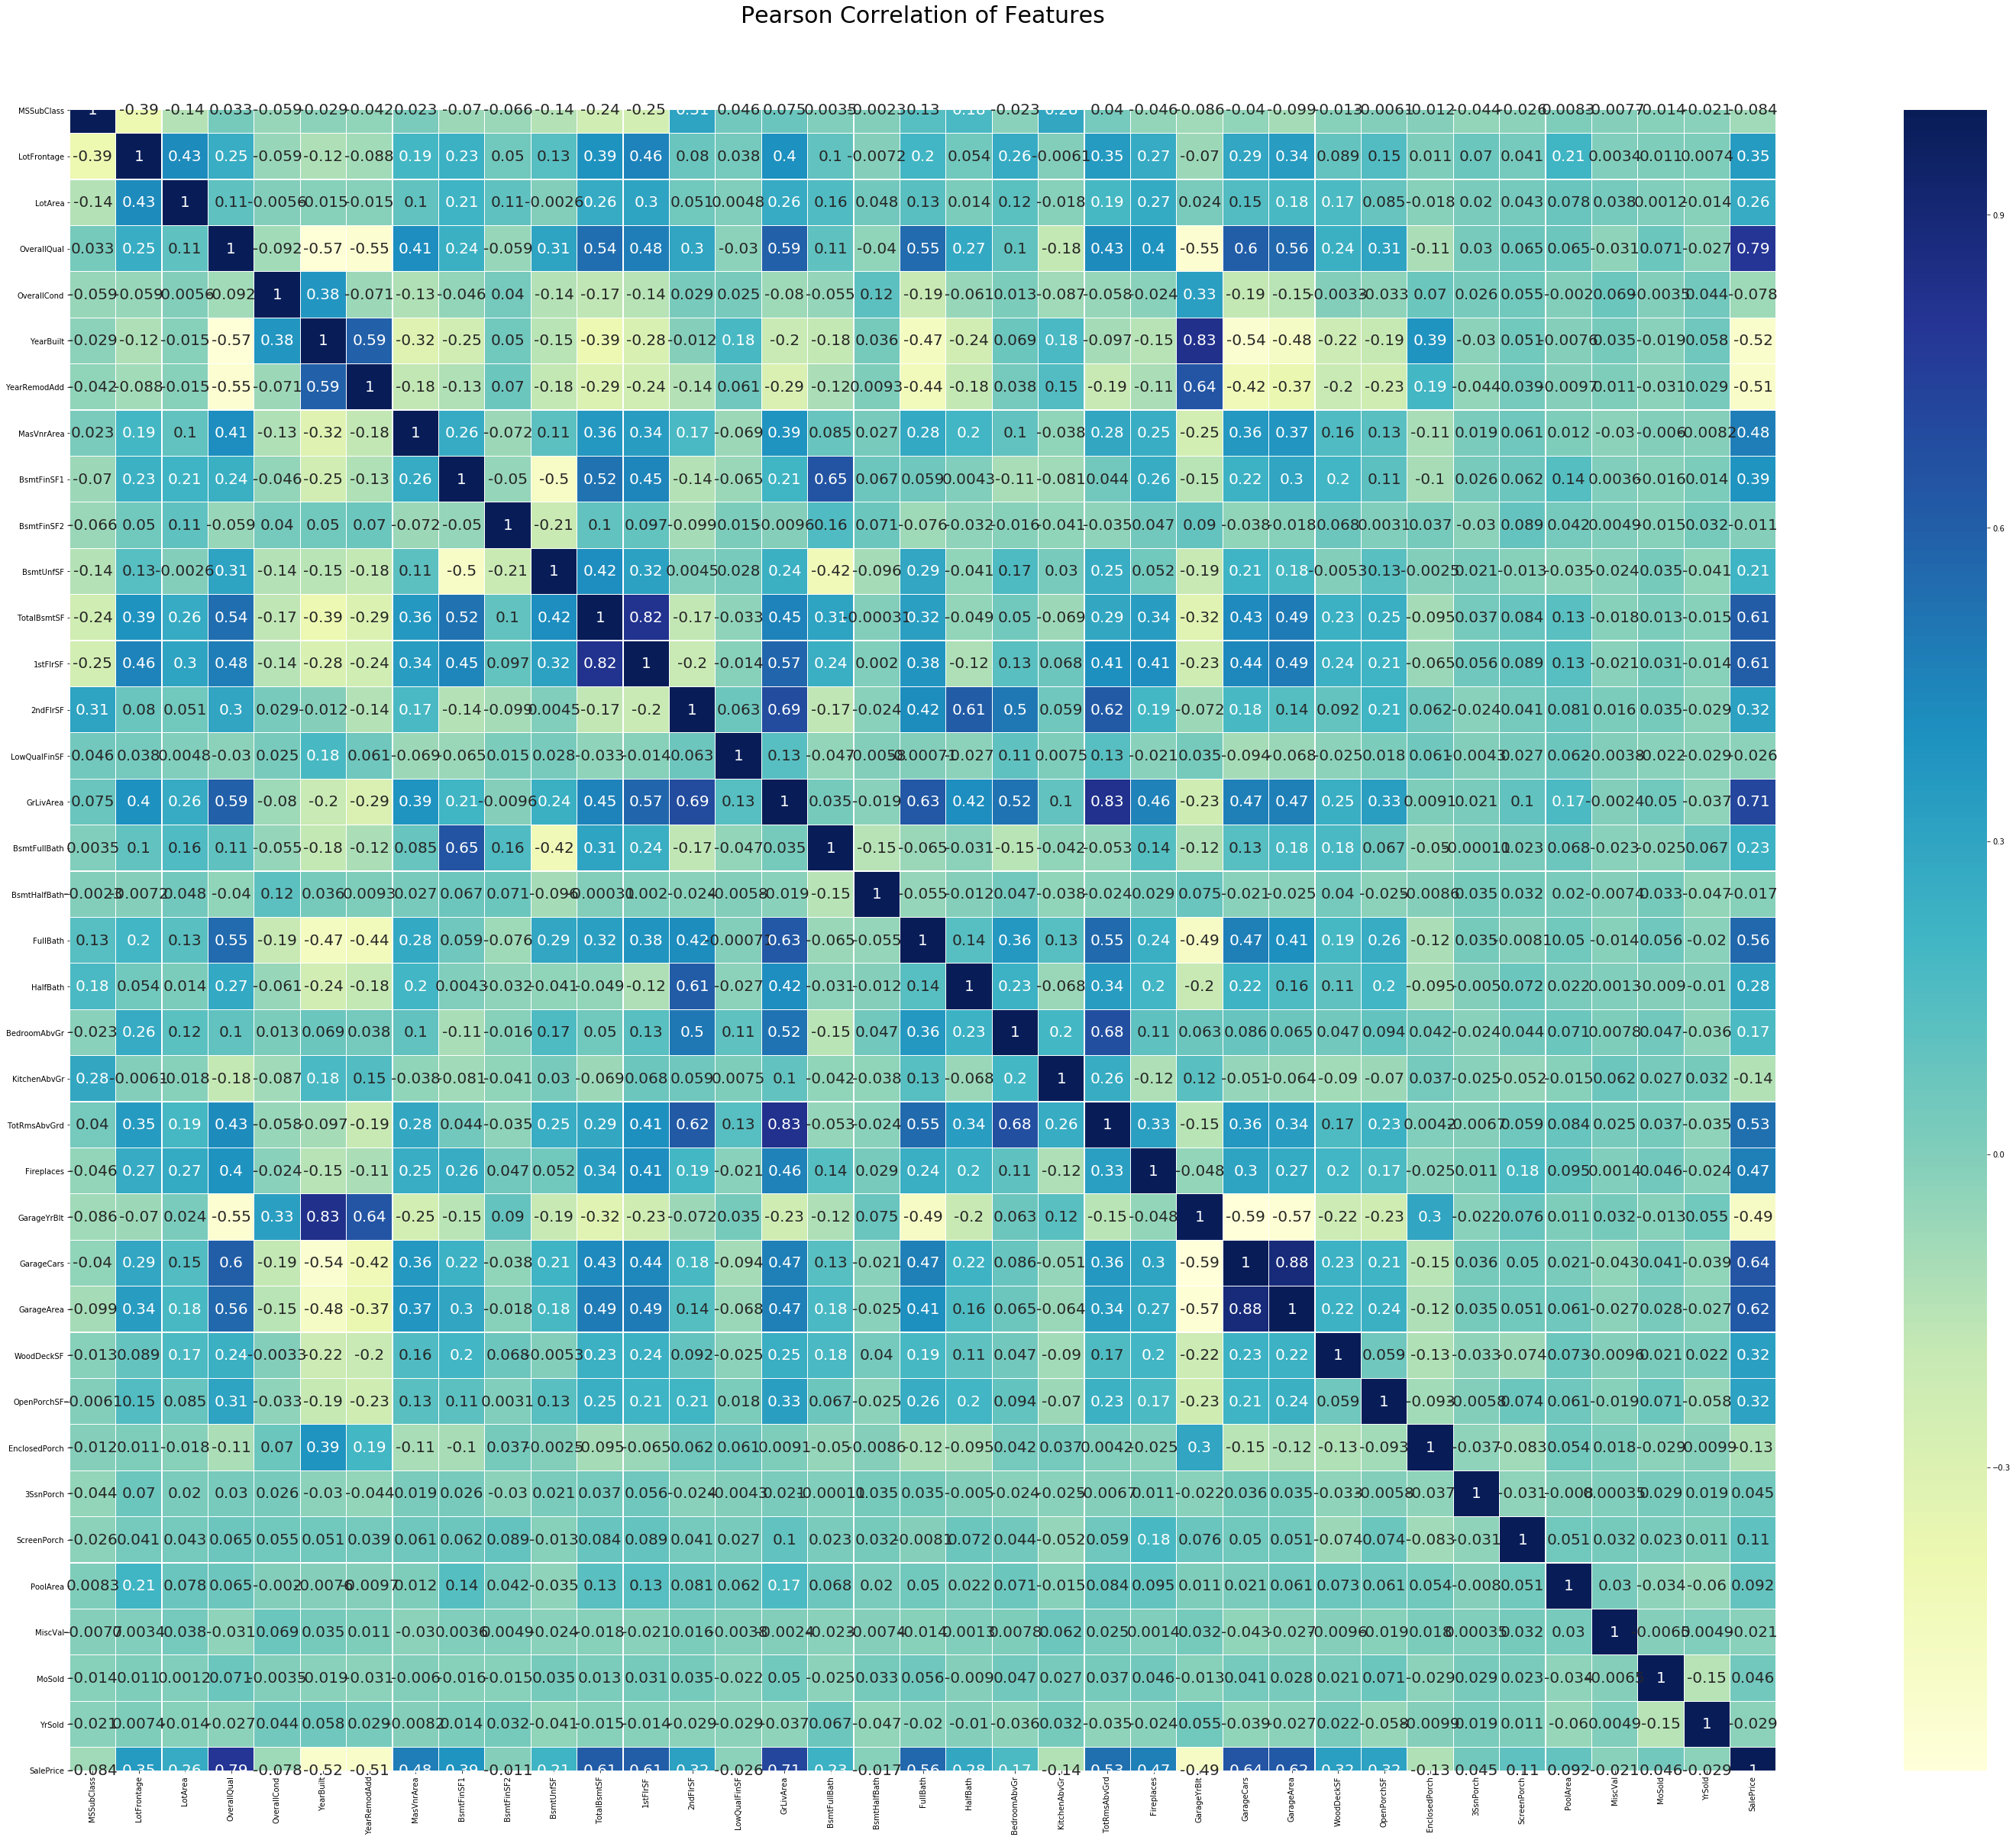

In [107]:
colormap = plt.cm.YlGnBu
plt.figure(figsize=(60,40))
plt.title('Pearson Correlation of Features', y=1.05, size=30)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={"size": 20})

In [108]:
pd.set_option('display.max_columns',38)
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,-0.028746,-0.041968,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.086185,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,-0.122848,-0.088417,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,-0.069559,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,-0.014832,-0.014709,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.024168,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,-0.572629,-0.552570,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,-0.547980,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,0.377325,-0.070931,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,0.326516,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.028746,-0.122848,-0.014832,-0.572629,0.377325,1.000000,0.594195,-0.315562,-0.248483,0.050422,-0.150619,-0.391498,-0.282143,-0.011552,0.182228,-0.200302,-0.184362,0.036060,-0.468403,-0.242728,0.068960,0.175918,-0.096955,-0.148544,0.826174,-0.538727,-0.479408,-0.223551,-0.190921,0.386228,-0.030487,0.050755,-0.007563,0.034545,-0.018777,0.057500,-0.523350
YearRemodAdd,-0.041968,-0.088417,-0.014709,-0.552570,-0.070931,0.594195,1.000000,-0.180183,-0.127556,0.069814,-0.183830,-0.292096,-0.241310,-0.141903,0.060573,-0.289805,-0.115183,0.009346,-0.440413,-0.184034,0.038273,0.151671,-0.194005,-0.114158,0.643039,-0.423236,-0.373447,-0.204340,-0.230057,0.193326,-0.044097,0.039437,-0.009671,0.010604,-0.030871,0.028592,-0.509079
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,-0.315562,-0.180183,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,-0.252557,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,-0.248483,-0.127556,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,-0.152298,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,0.050422,0.069814,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.089639,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-

LotFrontage correlated with LotArea(0.426095),1stFlrSF(0.457181)
MasVnrArea  correlated with OverallQual(0.411876)


In [109]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [110]:
for var in categorical:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

MasVnrType :  0.547945205479452 %
BsmtQual :  2.5342465753424657 %
BsmtCond :  2.5342465753424657 %
BsmtExposure :  2.6027397260273974 %
BsmtFinType1 :  2.5342465753424657 %
BsmtFinType2 :  2.6027397260273974 %
Electrical :  0.0684931506849315 %
FireplaceQu :  47.26027397260274 %
GarageType :  5.5479452054794525 %
GarageFinish :  5.5479452054794525 %
GarageQual :  5.5479452054794525 %
GarageCond :  5.5479452054794525 %
Fence :  80.75342465753424 %


In [111]:
for var in categorical:
    train[var].replace(to_replace=np.nan,value="Missing",inplace=True)

In [112]:
for var in categorical:
        print(var, '----->',train[var].unique())

MSZoning -----> ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street -----> ['Pave' 'Grvl']
LotShape -----> ['Reg' 'IR1' 'IR2' 'IR3']
LandContour -----> ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities -----> ['AllPub' 'NoSeWa']
LotConfig -----> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope -----> ['Gtl' 'Mod' 'Sev']
Neighborhood -----> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 -----> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 -----> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType -----> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle -----> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle -----> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl -----> ['CompShg' 'WdShngl' 'Metal' 'WdShake'

In [113]:
from sklearn import preprocessing

In [114]:
class my_dictionary(dict): 
  
    def __init__(self): 
        self = dict() 
     
    def add(self, key, value): 
        self[key] = value 

In [115]:
obj=my_dictionary()

In [116]:
le=preprocessing.LabelEncoder()
for var in categorical:
    train[var]=le.fit_transform(train[var])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    if("Missing" in le_name_mapping.keys()):
      train[var].replace(to_replace=le_name_mapping.get("Missing"),value=np.nan,inplace=True)
    #obj.add(var,le_name_mapping)
#print(obj)

In [117]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,...,2.0,2,548,5.0,5.0,2,0,61,0,0,0,0,NaN,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,...,2.0,2,460,5.0,5.0,2,298,0,0,0,0,0,NaN,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,...,2.0,2,608,5.0,5.0,2,0,42,0,0,0,0,NaN,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,...,3.0,3,642,5.0,5.0,2,0,35,272,0,0,0,NaN,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,...,2.0,3,836,5.0,5.0,2,192,84,0,0,0,0,NaN,0,12,2008,8,4,250000


In [118]:
for var in train.columns:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

LotFrontage :  17.73972602739726 %
MasVnrType :  0.547945205479452 %
MasVnrArea :  0.547945205479452 %
BsmtQual :  2.5342465753424657 %
BsmtCond :  2.5342465753424657 %
BsmtExposure :  2.6027397260273974 %
BsmtFinType1 :  2.5342465753424657 %
BsmtFinType2 :  2.6027397260273974 %
Electrical :  0.0684931506849315 %
FireplaceQu :  47.26027397260274 %
GarageType :  5.5479452054794525 %
GarageYrBlt :  5.5479452054794525 %
GarageFinish :  5.5479452054794525 %
GarageQual :  5.5479452054794525 %
GarageCond :  5.5479452054794525 %
Fence :  80.75342465753424 %


In [119]:
value=['BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','GarageFinish','FireplaceQu','GarageType','Electrical','Fence','GarageCond','GarageQual','BsmtFinType2']

In [120]:
for var in value:
    if(train[var].isnull().sum()>0):
        print(var,'---->', train[var].isnull().sum()*100/len(train[var]),'%')

BsmtFinType1 ----> 2.5342465753424657 %
BsmtExposure ----> 2.6027397260273974 %
BsmtCond ----> 2.5342465753424657 %
BsmtQual ----> 2.5342465753424657 %
MasVnrType ----> 0.547945205479452 %
GarageFinish ----> 5.5479452054794525 %
FireplaceQu ----> 47.26027397260274 %
GarageType ----> 5.5479452054794525 %
Electrical ----> 0.0684931506849315 %
Fence ----> 80.75342465753425 %
GarageCond ----> 5.5479452054794525 %
GarageQual ----> 5.5479452054794525 %
BsmtFinType2 ----> 2.6027397260273974 %


In [121]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,...,2.0,2,548,5.0,5.0,2,0,61,0,0,0,0,NaN,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,...,2.0,2,460,5.0,5.0,2,298,0,0,0,0,0,NaN,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,...,2.0,2,608,5.0,5.0,2,0,42,0,0,0,0,NaN,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,...,3.0,3,642,5.0,5.0,2,0,35,272,0,0,0,NaN,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,...,2.0,3,836,5.0,5.0,2,192,84,0,0,0,0,NaN,0,12,2008,8,4,250000


In [122]:
for var in continuous:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

LotFrontage :  17.73972602739726 %
MasVnrArea :  0.547945205479452 %


In [123]:
for var in discrete:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

In [124]:
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

LotFrontage correlated with LotArea(0.426095),1stFlrSF(0.457181)


MasVnrArea  correlated with OverallQual(0.411876)

In [128]:
linreg = LinearRegression()
data = train[['LotArea','1stFlrSF','LotFrontage']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['LotFrontage'].notnull()].drop(columns='LotFrontage')
y_train = data[data['LotFrontage'].notnull()]['LotFrontage']
x_test = data[data['LotFrontage'].isnull()].drop(columns='LotFrontage')
y_test = data[data['LotFrontage'].isnull()]['LotFrontage']

In [129]:
print(x_test)

      LotArea  1stFlrSF
Id                     
8       10382      1107
13      12968       912
15      10920      1253
17      11241      1004
25       8246      1060
...       ...       ...
1430    12546      1440
1432     4928       958
1442     4426       848
1444     8854       952
1447    26142      1188

[259 rows x 2 columns]


In [130]:
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


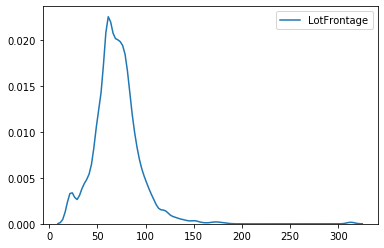

In [131]:
#before null value imputation
sns.kdeplot(train.LotFrontage)

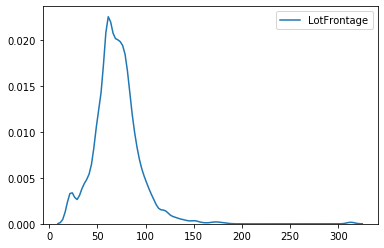

In [132]:
#after null value imputation
sns.kdeplot(train.LotFrontage)

In [133]:
train.LotFrontage[train.LotFrontage.isnull()] = predicted


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


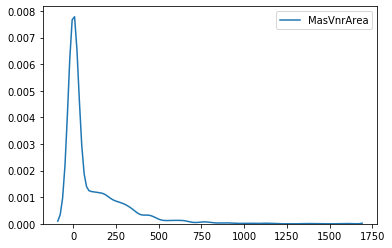

In [134]:
#before null value imutation
sns.kdeplot(train.MasVnrArea)

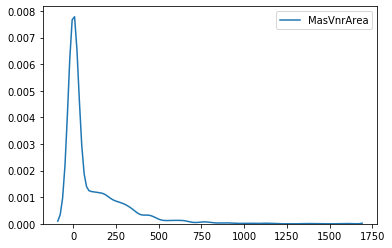

In [135]:
#after null value imutation
sns.kdeplot(train.MasVnrArea)

In [136]:
data = train[['OverallQual','MasVnrArea']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['MasVnrArea'].notnull()].drop(columns='MasVnrArea')
y_train = data[data['MasVnrArea'].notnull()]['MasVnrArea']
x_test = data[data['MasVnrArea'].isnull()].drop(columns='MasVnrArea')
y_test = data[data['MasVnrArea'].isnull()]['MasVnrArea']

In [137]:
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)

In [138]:
train.MasVnrArea[train.MasVnrArea.isnull()] = predicted

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
Id,,,,
1,5,5,5.0,2008
2,31,31,31.0,2007
3,7,6,7.0,2008
4,91,36,8.0,2006
5,8,8,8.0,2008


In [140]:
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [141]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,...,2.0,2,548,5.0,5.0,2,0,61,0,0,0,0,NaN,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,...,2.0,2,460,5.0,5.0,2,298,0,0,0,0,0,NaN,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,...,2.0,2,608,5.0,5.0,2,0,42,0,0,0,0,NaN,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,...,3.0,3,642,5.0,5.0,2,0,35,272,0,0,0,NaN,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,...,2.0,3,836,5.0,5.0,2,192,84,0,0,0,0,NaN,0,12,2008,8,4,250000


In [142]:
year.remove('YrSold')

In [143]:
year.remove('YearBuilt')

In [144]:
year

['YearRemodAdd', 'GarageYrBlt']

In [145]:
y_c=year+continuous

In [146]:
y_c

['YearRemodAdd',
 'GarageYrBlt',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [147]:
#finding relevant features for continuous variable using pearson correlation

#Using Pearson Correlation
#plt.figure(figsize=(60,40))
cor = train[y_c].corr(method='spearman')
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [148]:
cor_target = abs(cor["SalePrice"])


In [149]:
cor_target

YearRemodAdd     0.576528
GarageYrBlt      0.592042
LotFrontage      0.421837
LotArea          0.456461
MasVnrArea       0.424214
BsmtFinSF1       0.301871
BsmtFinSF2       0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF     0.067719
GrLivArea        0.731310
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch    0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
MiscVal          0.062727
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [150]:
relevant_features = cor_target[cor_target>0.5]
relevant_features=relevant_features.drop('SalePrice')

In [151]:
relevant_features

YearRemodAdd    0.576528
GarageYrBlt     0.592042
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
GarageArea      0.649379
Name: SalePrice, dtype: float64

In [152]:
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [153]:
discrete_df=train[discrete]

In [154]:
discrete_df

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
Id,,,,,,,,,,,,,,
1,60,7,5,1,0,2,1,3,1,8,0,2,0,2
2,20,6,8,0,1,2,0,3,1,6,1,2,0,5
3,60,7,5,1,0,2,1,3,1,6,1,2,0,9
4,70,7,5,1,0,1,0,3,1,7,1,3,0,2
5,60,8,5,1,0,2,1,4,1,9,1,3,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,6,5,0,0,2,1,3,1,7,1,2,0,8
1457,20,6,6,1,0,2,0,3,1,7,2,2,0,2
1458,70,7,9,0,0,2,0,4,1,9,2,1,0,5


In [159]:
fvalue_selector = SelectKBest(f_classif, k=1)

In [160]:
X_kbest=fvalue_selector.fit(discrete_df,train.SalePrice)

In [162]:
anova=f_classif(discrete_df,train.SalePrice)

In [163]:
p_values =pd.Series(anova[1],index = discrete_df.columns)
p_values.sort_values(ascending = False)

BsmtHalfBath     9.865674e-01
MSSubClass       9.659980e-01
KitchenAbvGr     9.628262e-01
MoSold           7.644619e-01
PoolArea         5.937455e-01
OverallCond      9.200359e-02
BsmtFullBath     4.326529e-02
BedroomAbvGr     2.144007e-03
HalfBath         1.410758e-06
Fireplaces       1.236756e-11
TotRmsAbvGrd     1.437944e-17
FullBath         5.306331e-40
GarageCars       4.126516e-45
OverallQual     1.344399e-114
dtype: float64

In [164]:
dis_req=pd.DataFrame(p_values)

In [166]:
dis_features=dis_req.index[dis_req[0]<0.05].to_list()

In [167]:
dis_features

['OverallQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [168]:
categorical_df=train[categorical]

In [169]:
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,4.0,2.0,6.0,1,0,1,5.0,2,6,NaN,1.0,2.0,5.0,5.0,2,NaN,8,4
2,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3.0,3,4,...,4.0,1.0,0.0,6.0,1,0,1,5.0,3,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
3,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,3.0,2.0,6.0,1,0,1,5.0,2,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
4,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3.0,3,4,...,1.0,4.0,0.0,6.0,1,2,1,5.0,2,6,2.0,5.0,3.0,5.0,5.0,2,NaN,8,0
5,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,0.0,2.0,6.0,1,0,1,5.0,2,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4


In [170]:
for var in categorical:
    if(train[var].isnull().sum()>0):
        print(var,": ",train[var].isnull().mean()*100,"%")

MasVnrType :  0.547945205479452 %
BsmtQual :  2.5342465753424657 %
BsmtCond :  2.5342465753424657 %
BsmtExposure :  2.6027397260273974 %
BsmtFinType1 :  2.5342465753424657 %
BsmtFinType2 :  2.6027397260273974 %
Electrical :  0.0684931506849315 %
FireplaceQu :  47.26027397260274 %
GarageType :  5.5479452054794525 %
GarageFinish :  5.5479452054794525 %
GarageQual :  5.5479452054794525 %
GarageCond :  5.5479452054794525 %
Fence :  80.75342465753424 %


In [171]:
for var in categorical:
    if(train[var].isnull().sum()==0):
        print(var)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [172]:
linreg = LinearRegression()
data = train[['LotArea','1stFlrSF','LotFrontage']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['LotFrontage'].notnull()].drop(columns='LotFrontage')
print(x_train)
y_train = data[data['LotFrontage'].notnull()]['LotFrontage']
x_test = data[data['LotFrontage'].isnull()].drop(columns='LotFrontage')
y_test = data[data['LotFrontage'].isnull()]['LotFrontage']

      LotArea  1stFlrSF
Id                     
1        8450       856
2        9600      1262
3       11250       920
4        9550       961
5       14260      1145
...       ...       ...
1456     7917       953
1457    13175      2073
1458     9042      1188
1459     9717      1078
1460     9937      1256

[1460 rows x 2 columns]


In [173]:
def cat_imp1(var):
    linreg = LinearRegression()
    data = train['MasVnrType','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition']
    print(data)
    #Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
    x_train = data[data[var].notnull()]
    y_train = data[data[var].notnull()][var]
    x_test = data[data[var].isnull()]
    print(x_test)
    y_test = data[data[var].isnull()][var]
    #Step-2: Train the machine learning algorithm
    linreg.fit(x_train, y_train)
    #Step-3: Predict the missing values in the attribute of the test data.
    #predicted = linreg.predict(x_test)
    #df.var[df.var.isnull()] = predicted

In [ ]:
#%reset
#cat_imp1('MasVnrType')

In [ ]:
#from sklearn.ensemble import RandomForestClassfier
#from sklearn.feature_selection import SelectFromModel

In [ ]:
#pip install missingpy

In [174]:
from missingpy import MissForest

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [175]:
categorical_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,4.0,2.0,6.0,1,0,1,5.0,2,6,NaN,1.0,2.0,5.0,5.0,2,NaN,8,4
2,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3.0,3,4,...,4.0,1.0,0.0,6.0,1,0,1,5.0,3,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
3,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,3.0,2.0,6.0,1,0,1,5.0,2,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
4,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3.0,3,4,...,1.0,4.0,0.0,6.0,1,2,1,5.0,2,6,2.0,5.0,3.0,5.0,5.0,2,NaN,8,0
5,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1.0,2,4,...,4.0,0.0,2.0,6.0,1,0,1,5.0,2,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3.0,3,4,...,4.0,4.0,6.0,6.0,1,0,1,5.0,3,6,5.0,1.0,2.0,5.0,5.0,2,NaN,8,4
1457,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,4.0,3,4,...,4.0,4.0,0.0,5.0,1,4,1,5.0,3,2,5.0,1.0,3.0,5.0,5.0,2,3.0,8,4
1458,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,3.0,0,2,...,1.0,4.0,2.0,6.0,1,0,1,5.0,2,6,2.0,1.0,2.0,5.0,5.0,2,0.0,8,4


In [176]:
imp = MissForest(n_estimators = 50, min_samples_split = 20, max_depth = 50)
imp.fit(categorical_df,cat_vars=[0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39])
train_filled = pd.DataFrame(data= imp.transform(categorical_df),columns= categorical_df.columns , index=categorical_df.index)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [177]:
train_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 40 columns):
MSZoning         1460 non-null float64
Street           1460 non-null float64
LotShape         1460 non-null float64
LandContour      1460 non-null float64
Utilities        1460 non-null float64
LotConfig        1460 non-null float64
LandSlope        1460 non-null float64
Neighborhood     1460 non-null float64
Condition1       1460 non-null float64
Condition2       1460 non-null float64
BldgType         1460 non-null float64
HouseStyle       1460 non-null float64
RoofStyle        1460 non-null float64
RoofMatl         1460 non-null float64
Exterior1st      1460 non-null float64
Exterior2nd      1460 non-null float64
MasVnrType       1460 non-null float64
ExterQual        1460 non-null float64
ExterCond        1460 non-null float64
Foundation       1460 non-null float64
BsmtQual         1460 non-null float64
BsmtCond         1460 non-null float64
BsmtExposure     1460 non-null floa

In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [179]:
fvalue_selector = SelectKBest(f_classif, k=1)

In [180]:
X_kbest=fvalue_selector.fit(train_filled,train.SalePrice)

In [181]:
%%time
anova=f_classif(train_filled,train.SalePrice)

Wall time: 142 ms


In [182]:
anova

(array([1.74279143, 1.87071671, 1.40406383, 1.07932234, 0.23979597,
        0.96051785, 1.19512278, 1.25048117, 0.77774332, 1.53690841,
        1.0230173 , 1.03968572, 1.17359142, 1.06878513, 0.98124198,
        1.0138328 , 1.16711547, 3.77488006, 0.86963115, 1.49884615,
        2.54957781, 1.00824317, 1.4125109 , 1.00773493, 0.83070797,
        1.47972092, 1.28765551, 1.57227624, 1.14602249, 2.90474456,
        0.80398554, 1.03069294, 1.49523252, 2.19363169, 0.97555767,
        0.8111015 , 1.1170095 , 1.28601701, 0.80506341, 0.9984108 ]),
 array([3.56635018e-14, 1.66675420e-17, 2.35686669e-06, 1.51632266e-01,
        1.00000000e+00, 7.04999519e-01, 8.12289343e-03, 1.28812600e-03,
        9.99609036e-01, 3.40574650e-09, 3.78930340e-01, 2.99535563e-01,
        1.54590879e-02, 1.84770921e-01, 5.99545611e-01, 4.25830403e-01,
        1.86029450e-02, 1.39991829e-69, 9.69299114e-01, 2.41125778e-08,
        2.30290094e-36, 4.55150444e-01, 1.59623421e-06, 4.57838870e-01,
        9.93468394e-01

In [183]:
#%%time
p_values =pd.Series(anova[1],index = train_filled.columns)
p_values.sort_values(ascending = False)

Utilities        1.000000e+00
Condition1       9.996090e-01
Functional       9.982371e-01
SaleType         9.981336e-01
GarageCond       9.974480e-01
BsmtFinType2     9.934684e-01
ExterCond        9.692991e-01
LotConfig        7.049995e-01
GarageQual       6.293802e-01
Exterior1st      5.995456e-01
SaleCondition    5.076131e-01
BsmtFinType1     4.578389e-01
BsmtCond         4.551504e-01
Exterior2nd      4.258304e-01
BldgType         3.789303e-01
FireplaceQu      3.413257e-01
HouseStyle       2.995356e-01
RoofMatl         1.847709e-01
LandContour      1.516323e-01
PavedDrive       6.786390e-02
Electrical       3.306349e-02
MasVnrType       1.860295e-02
RoofStyle        1.545909e-02
LandSlope        8.122893e-03
Neighborhood     1.288126e-03
Fence            3.464877e-04
HeatingQC        3.253813e-04
LotShape         2.356867e-06
BsmtExposure     1.596234e-06
Heating          6.295772e-08
GarageType       2.894304e-08
Foundation       2.411258e-08
Condition2       3.405747e-09
CentralAir

In [184]:
cat_req=pd.DataFrame(p_values)


In [185]:
cat_req

,0
MSZoning,3.566350e-14
Street,1.666754e-17
LotShape,2.356867e-06
LandContour,1.516323e-01
Utilities,1.000000e+00
LotConfig,7.049995e-01
LandSlope,8.122893e-03
Neighborhood,1.288126e-03
Condition1,9.996090e-01
Condition2,3.405747e-09


In [186]:
cate_features=cat_req.index[cat_req[0]<0.05].to_list()

In [187]:
cate_features

['MSZoning',
 'Street',
 'LotShape',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'Fence']

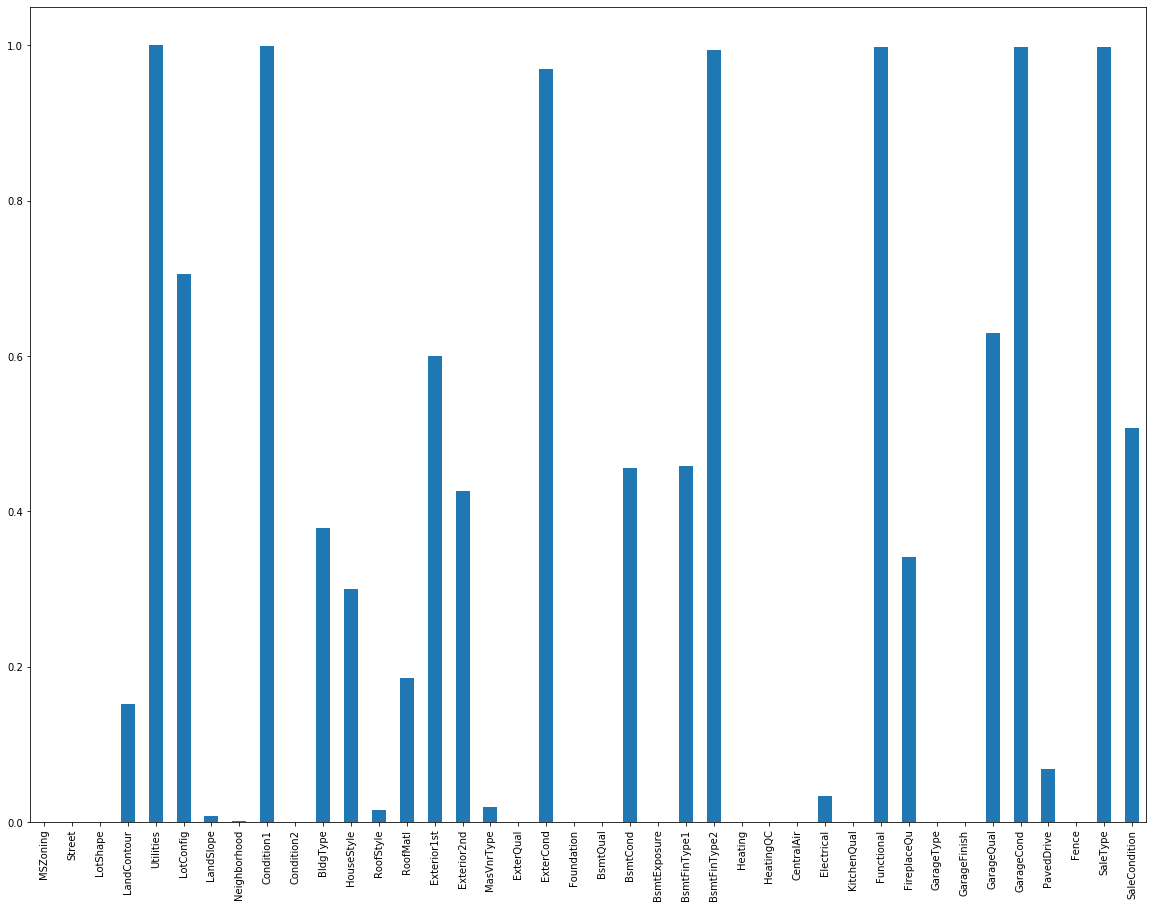

In [188]:
# the larger p-value means that variables is independent of the respone and can not be considered for model training
plt.figure(figsize=(20,15))
p_values.plot(kind='bar')

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
X_train, X_test, y_train, y_test = train_test_split(
...     train_filled,train.SalePrice, test_size=0.33, random_state=42)

In [193]:
model_tree = RandomForestRegressor(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
#print(model_tree.feature_importances_)
#sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
# since we already fit the data, we specify prefit option here
# Features whose importance is greater or equal to the threshold are kept while the others are discarded.
#X_train_sfm_tree = sel_model_tree.transform(train_filled)
#print(sel_model_tree.get_support())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [194]:
model_tree.score(X_test,y_test)

0.7212292993191156

In [195]:
cat_imp_features_random=pd.Series(model_tree.feature_importances_, index=train_filled.columns)

In [196]:
cat_imp_features_random.sort_values(ascending=False)

ExterQual        0.331513
BsmtQual         0.132200
KitchenQual      0.069239
Neighborhood     0.062389
GarageType       0.056621
GarageFinish     0.032557
Exterior2nd      0.022522
BsmtExposure     0.021446
HouseStyle       0.019888
ExterCond        0.019364
Exterior1st      0.018991
FireplaceQu      0.017203
BldgType         0.016016
LandContour      0.015532
LandSlope        0.015269
MasVnrType       0.015269
BsmtFinType1     0.012439
LotShape         0.012059
RoofStyle        0.010537
MSZoning         0.009709
LotConfig        0.009419
CentralAir       0.009034
SaleCondition    0.008569
HeatingQC        0.007520
Foundation       0.007436
BsmtFinType2     0.007366
Condition1       0.006932
Fence            0.005630
Heating          0.004717
RoofMatl         0.004110
SaleType         0.003797
BsmtCond         0.003630
Functional       0.003244
PavedDrive       0.002957
GarageQual       0.002383
Electrical       0.001493
GarageCond       0.000560
Condition2       0.000388
Street      

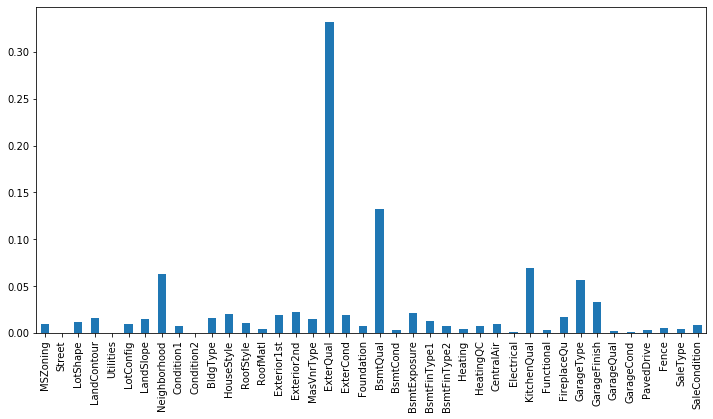

In [197]:
cat_imp_features_random.plot(kind='bar',figsize=(12, 6))

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [200]:
cat_imp_features=pd.Series(clf.feature_importances_, index=train_filled.columns)

In [201]:
clf.score(X_test,y_test)

0.4888714650999524

In [202]:
cat_imp_features.sort_values(ascending=False)

ExterQual        0.362623
BsmtQual         0.144262
Neighborhood     0.065224
KitchenQual      0.058221
GarageType       0.044087
GarageFinish     0.043525
BsmtExposure     0.032581
ExterCond        0.024304
FireplaceQu      0.020868
LandContour      0.020847
HouseStyle       0.016962
Exterior1st      0.015585
BldgType         0.015149
MasVnrType       0.012546
BsmtFinType1     0.012405
Exterior2nd      0.011061
LandSlope        0.010810
HeatingQC        0.009083
MSZoning         0.008209
Heating          0.008179
BsmtFinType2     0.007229
LotConfig        0.007187
LotShape         0.006933
RoofStyle        0.005753
Condition1       0.005632
CentralAir       0.004982
SaleType         0.003682
SaleCondition    0.003589
Foundation       0.003553
BsmtCond         0.003238
Functional       0.002611
RoofMatl         0.002560
PavedDrive       0.001920
Fence            0.001859
Electrical       0.001581
GarageCond       0.000573
GarageQual       0.000566
Condition2       0.000021
Utilities   

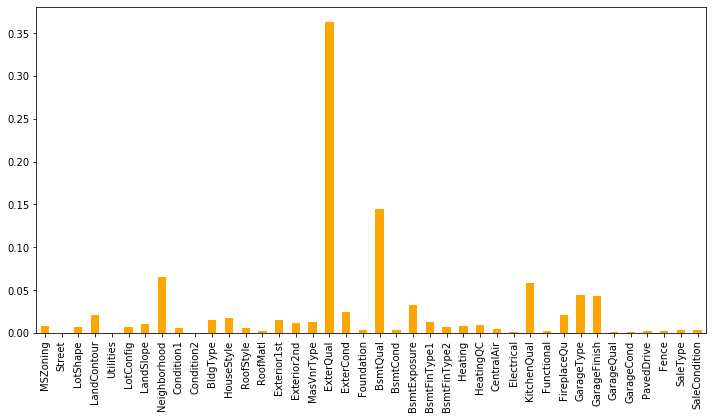

In [203]:
pd.Series(clf.feature_importances_, index=train_filled.columns).plot.bar(color='orange', figsize=(12, 6))

In [204]:
relevant_features

YearRemodAdd    0.576528
GarageYrBlt     0.592042
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
GarageArea      0.649379
Name: SalePrice, dtype: float64

In [205]:
num_req=pd.DataFrame(relevant_features)

In [206]:
num_features=num_req.index.to_list()

In [207]:
num_features

['YearRemodAdd',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea']

In [212]:
dis_features

['OverallQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [208]:
cate_features

['MSZoning',
 'Street',
 'LotShape',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'Fence']

In [209]:
cat_imp_features_random.sort_values(ascending=True)

Utilities        0.000000
Street           0.000053
Condition2       0.000388
GarageCond       0.000560
Electrical       0.001493
GarageQual       0.002383
PavedDrive       0.002957
Functional       0.003244
BsmtCond         0.003630
SaleType         0.003797
RoofMatl         0.004110
Heating          0.004717
Fence            0.005630
Condition1       0.006932
BsmtFinType2     0.007366
Foundation       0.007436
HeatingQC        0.007520
SaleCondition    0.008569
CentralAir       0.009034
LotConfig        0.009419
MSZoning         0.009709
RoofStyle        0.010537
LotShape         0.012059
BsmtFinType1     0.012439
MasVnrType       0.015269
LandSlope        0.015269
LandContour      0.015532
BldgType         0.016016
FireplaceQu      0.017203
Exterior1st      0.018991
ExterCond        0.019364
HouseStyle       0.019888
BsmtExposure     0.021446
Exterior2nd      0.022522
GarageFinish     0.032557
GarageType       0.056621
Neighborhood     0.062389
KitchenQual      0.069239
BsmtQual    

In [210]:
p_values.sort_values(ascending=False)

Utilities        1.000000e+00
Condition1       9.996090e-01
Functional       9.982371e-01
SaleType         9.981336e-01
GarageCond       9.974480e-01
BsmtFinType2     9.934684e-01
ExterCond        9.692991e-01
LotConfig        7.049995e-01
GarageQual       6.293802e-01
Exterior1st      5.995456e-01
SaleCondition    5.076131e-01
BsmtFinType1     4.578389e-01
BsmtCond         4.551504e-01
Exterior2nd      4.258304e-01
BldgType         3.789303e-01
FireplaceQu      3.413257e-01
HouseStyle       2.995356e-01
RoofMatl         1.847709e-01
LandContour      1.516323e-01
PavedDrive       6.786390e-02
Electrical       3.306349e-02
MasVnrType       1.860295e-02
RoofStyle        1.545909e-02
LandSlope        8.122893e-03
Neighborhood     1.288126e-03
Fence            3.464877e-04
HeatingQC        3.253813e-04
LotShape         2.356867e-06
BsmtExposure     1.596234e-06
Heating          6.295772e-08
GarageType       2.894304e-08
Foundation       2.411258e-08
Condition2       3.405747e-09
CentralAir

In [211]:
cate_features

['MSZoning',
 'Street',
 'LotShape',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'Fence']

In [213]:
selected_features=cate_features+num_features

In [214]:
selected_features

['MSZoning',
 'Street',
 'LotShape',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'Fence',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'OverallQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
LotArea        1460 non-null int64
1stFlrSF       1460 non-null int64
LotFrontage    1460 non-null float64
dtypes: float64(1), int64(2)
memory usage: 85.6 KB


In [216]:
len(selected_features)

34

In [217]:
data1=train_filled[[c for c in train_filled.columns if c in selected_features]]

In [218]:
data1

,MSZoning,Street,LotShape,LandSlope,Neighborhood,Condition2,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,Fence
Id,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0
2,3.0,1.0,3.0,0.0,24.0,2.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0
3,3.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0
4,3.0,1.0,0.0,0.0,6.0,2.0,1.0,3.0,3.0,0.0,4.0,4.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,3.0
5,3.0,1.0,0.0,0.0,15.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,0.0,8.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0
1457,3.0,1.0,3.0,0.0,14.0,2.0,1.0,4.0,3.0,1.0,2.0,4.0,1.0,4.0,1.0,5.0,3.0,1.0,3.0,3.0
1458,3.0,1.0,3.0,0.0,6.0,2.0,1.0,3.0,0.0,4.0,4.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,0.0


YearRemodAdd    0.576528
GarageYrBlt     0.592042
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
GarageArea      0.649379
Name: SalePrice, dtype: float64

In [219]:
data2=train[[c for c in train.columns if c in relevant_features]]

In [223]:
relevant_features

YearRemodAdd    0.576528
GarageYrBlt     0.592042
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
GarageArea      0.649379
Name: SalePrice, dtype: float64

In [220]:
data2

,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea
Id,,,,,,
1,5,856,856,1710,5.0,548
2,31,1262,1262,1262,31.0,460
3,6,920,920,1786,7.0,608
4,36,756,961,1717,8.0,642
5,8,1145,1145,2198,8.0,836
...,...,...,...,...,...,...
1456,7,953,953,1647,8.0,460
1457,22,1542,2073,2073,32.0,500
1458,4,1152,1188,2340,69.0,252


In [227]:
data3=train[[c for c in train.columns if c in dis_features]]

In [228]:
data3

,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
Id,,,,,,,,
1,7,1,2,1,3,8,0,2
2,6,0,2,0,3,6,1,2
3,7,1,2,1,3,6,1,2
4,7,1,1,0,3,7,1,3
5,8,1,2,1,4,9,1,3
...,...,...,...,...,...,...,...,...
1456,6,0,2,1,3,7,1,2
1457,6,1,2,0,3,7,2,2
1458,7,0,2,0,4,9,2,1


In [ ]:
#checking heteroscedasticity


In [234]:
total_data1=pd.merge(data1, data2, on='Id',  how='outer')

In [235]:
total_data1

,MSZoning,Street,LotShape,LandSlope,Neighborhood,Condition2,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,Fence,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,5,856,856,1710,5.0,548
2,3.0,1.0,3.0,0.0,24.0,2.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0,31,1262,1262,1262,31.0,460
3,3.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,6,920,920,1786,7.0,608
4,3.0,1.0,0.0,0.0,6.0,2.0,1.0,3.0,3.0,0.0,4.0,4.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,3.0,36,756,961,1717,8.0,642
5,3.0,1.0,0.0,0.0,15.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,8,1145,1145,2198,8.0,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,0.0,8.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0,7,953,953,1647,8.0,460
1457,3.0,1.0,3.0,0.0,14.0,2.0,1.0,4.0,3.0,1.0,2.0,4.0,1.0,4.0,1.0,5.0,3.0,1.0,3.0,3.0,22,1542,2073,2073,32.0,500
1458,3.0,1.0,3.0,0.0,6.0,2.0,1.0,3.0,0.0,4.0,4.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,0.0,4,1152,1188,2340,69.0,252


In [236]:
total_data=pd.merge(total_data1, data3, on='Id',  how='outer')

In [237]:
total_data

,MSZoning,Street,LotShape,LandSlope,Neighborhood,Condition2,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,Fence,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,5,856,856,1710,5.0,548,7,1,2,1,3,8,0,2
2,3.0,1.0,3.0,0.0,24.0,2.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0,31,1262,1262,1262,31.0,460,6,0,2,0,3,6,1,2
3,3.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,6,920,920,1786,7.0,608,7,1,2,1,3,6,1,2
4,3.0,1.0,0.0,0.0,6.0,2.0,1.0,3.0,3.0,0.0,4.0,4.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,3.0,36,756,961,1717,8.0,642,7,1,1,0,3,7,1,3
5,3.0,1.0,0.0,0.0,15.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,3.0,8,1145,1145,2198,8.0,836,8,1,2,1,4,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,0.0,8.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0,3.0,7,953,953,1647,8.0,460,6,0,2,1,3,7,1,2
1457,3.0,1.0,3.0,0.0,14.0,2.0,1.0,4.0,3.0,1.0,2.0,4.0,1.0,4.0,1.0,5.0,3.0,1.0,3.0,3.0,22,1542,2073,2073,32.0,500,6,1,2,0,3,7,2,2
1458,3.0,1.0,3.0,0.0,6.0,2.0,1.0,3.0,0.0,4.0,4.0,4.0,1.0,0.0,1.0,5.0,2.0,1.0,2.0,0.0,4,1152,1188,2340,69.0,252,7,0,2,0,4,9,2,1


In [238]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 34 columns):
MSZoning        1460 non-null float64
Street          1460 non-null float64
LotShape        1460 non-null float64
LandSlope       1460 non-null float64
Neighborhood    1460 non-null float64
Condition2      1460 non-null float64
RoofStyle       1460 non-null float64
MasVnrType      1460 non-null float64
ExterQual       1460 non-null float64
Foundation      1460 non-null float64
BsmtQual        1460 non-null float64
BsmtExposure    1460 non-null float64
Heating         1460 non-null float64
HeatingQC       1460 non-null float64
CentralAir      1460 non-null float64
Electrical      1460 non-null float64
KitchenQual     1460 non-null float64
GarageType      1460 non-null float64
GarageFinish    1460 non-null float64
Fence           1460 non-null float64
YearRemodAdd    1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
GrLivArea       1460 non-

In [241]:
y=train['SalePrice']

In [242]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [243]:
X_train, X_test, y_train, y_test = train_test_split(
...     total_data,y, test_size=0.33, random_state=42)

In [251]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [250]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [252]:
classifier=xgboost.XGBRegressor()

In [258]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   45.4s finished
D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:57:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs

In [256]:
import sklearn

In [257]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [259]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [260]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [261]:
best_xgb_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
best_xgb_model.fit(X_train,y_train)

[11:58:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [262]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [263]:
predictions = best_xgb_model.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8892271170088122


In [264]:
print(r2_score(predictions,y_test))

0.8891040107722612
